# INITIAL FORAY INTO INSURANCE DATA

In [31]:
#data from this kaggle comp.: https://www.kaggle.com/c/homesite-quote-conversion
#I NEED TO ADD MORE COMMENTS, I KNOW!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
##check out tutorial here:
##http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb
df_train = pd.read_csv('train.csv')
df_train.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [32]:
df_train = df_train[0:2000]
df_train.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [33]:
#df_train = df_train[1:1000]
#see here: http://scikit-learn.org/stable/modules/preprocessing.html#imputation
from sklearn.decomposition import PCA #import principal component analysis
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
df_train_nt = df_train.drop('QuoteConversion_Flag', 1)
#http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/
df_hot = pd.get_dummies(df_train_nt)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df_hot)
df_hot_imp = imp.transform(df_hot)
pca = PCA(n_components=2) #Instantiate the model & set parameters
pca.fit(scale(df_hot_imp)); #Fit the model
df_pca = pca.transform(scale(df_hot_imp))#Apply the model. For embeddings / decompositions, this is transform.
print(df_pca.shape)

(2000, 2)


The amount of variance explained by the 1st & 2nd principal components are 0.036 & 0.022 respectively.


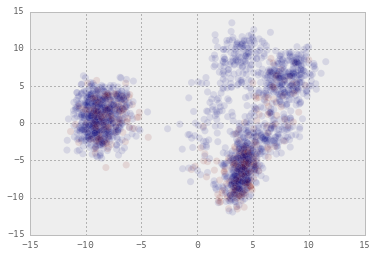

In [34]:
plt.scatter(df_pca[:, 0], df_pca[:, 1] , c = df_train['QuoteConversion_Flag'] , s = 50 , alpha=0.1);
print("The amount of variance explained by the 1st & 2nd principal components are %s & %s respectively." 
      % (round(pca.explained_variance_ratio_[0],3) , round(pca.explained_variance_ratio_[1],3)))

In [35]:
dff = df_hot.ix[:,1:4] #http://stackoverflow.com/questions/11285613/selecting-columns
dff.head()

,Field7,Field8,Field9
0,23,0.9403,0.0006
1,7,1.0006,0.0040
2,7,1.0006,0.0040
3,10,0.9769,0.0004
4,23,0.9472,0.0006


In [36]:
from mpl_toolkits.mplot3d import Axes3D
pca3d = PCA(n_components=3) #Instantiate the model & set parameters
pca3d.fit(scale(df_hot_imp)); #Fit the model
df_pca = pca3d.transform(scale(df_hot_imp))#Apply the model. For embeddings / decompositions, this is transform.
print(df_pca.shape)

(2000, 3)


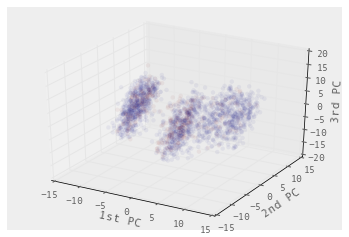

In [37]:
#http://pythonprogramming.net/matplotlib-3d-scatterplot-tutorial/
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:,2], c = df_train['QuoteConversion_Flag'], alpha=0.05)
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
plt.show()

In [ ]:
#next: remove outliers and check out PCA then.

In [38]:
df = scale(df_hot_imp) #scaled data
np.shape(df)

(2000, 1306)

<h2>SPLIT DATA INTO TRAINING AND TEST SETS</h2>

In [39]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df_train['QuoteConversion_Flag'], test_size = 0.1, 
                                                    random_state=0)
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (1800, 1306)
y_train shape: (1800,)
X_test shape: (200, 1306)
y_test shape: (200,)


<h2>LET'S TRY A LINEAR SVM WITH K-FOLD CROSS VALIDATION</h2>

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   30.9s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   60.0s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'C': 0.001}
0.777777777778


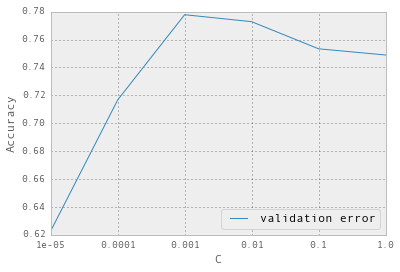

In [41]:
from sklearn.svm import LinearSVC
svm = LinearSVC() # Instantiate the model.
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
#also see here: http://scikit-learn.org/stable/auto_examples/grid_search_digits.html
svm = LinearSVC() # Instantiate the model
tuned_parameters = {'C':10.**np.arange(-5,1)}
grid_search = GridSearchCV( svm , param_grid = tuned_parameters , cv = 10 ,verbose = 1 )
grid_search.fit(X_train, y_train);
print(grid_search.best_params_)
print(grid_search.best_score_)
##see here about the scoring:
##http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
##E.g. gives "accuracy" for SVMs:
##http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
plt.plot([c.mean_validation_score for c in grid_search.grid_scores_], label="validation error")
plt.xticks(np.arange(6), tuned_parameters['C']); plt.xlabel("C"); plt.ylabel("Accuracy");plt.legend(loc='best');
#see this thread concerning mean_training_score:
#http://stackoverflow.com/questions/23389334/how-to-calculate-the-mean-training-score-using-gridsearchcv-in-scikit-learns